In [16]:
!nvidia-smi

Thu Jan 30 15:46:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  |   00000000:01:00.0  On |                  Off |
| 32%   45C    P8             10W /  450W |     876MiB /  24564MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


## Imports

In [18]:
from roboflow import Roboflow
from IPython.display import Image

## Pull dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="VCevAEcFL0sYcXK3HkUv")
project = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi")
version = project.version(15)
dataset = version.download("yolov8")

## Custom training

In [19]:
import yaml

yaml_path = r"C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\data.yaml"

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print("Keys in data.yaml:", data.keys())

if "kpt_shape" in data:
    print("kpt_shape:", data["kpt_shape"])
else:
    print("❌ 'kpt_shape' is missing!")


Keys in data.yaml: dict_keys(['flip_idx', 'kpt_shape', 'names', 'nc', 'roboflow', 'test', 'train', 'val'])
kpt_shape: [32, 3]


In [20]:
%cd {HOME}

!yolo task=pose mode=train model="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\yolov8x-pose.pt" data="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\data.yaml" batch=16 epochs=50 imgsz=640 mosaic=0.0 plots=True device=0 verbose=True project="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results" name="football_training_pitch_b16_e50_8x"

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP
Ultralytics 8.3.69 🚀 Python-3.8.8 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=pose, mode=train, model=C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\yolov8x-pose.pt, data=C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results, name=football_training_pitch_b16_e50_8x, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride


train: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\train\labels.cache... 255 images, 0 backgrounds, 0 corrupt: 100%|██████████| 255/255 [00:00<?, ?it/s]
train: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\train\labels.cache... 255 images, 0 backgrounds, 0 corrupt: 100%|██████████| 255/255 [00:00<?, ?it/s]

val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\valid\labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\valid\labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]
       1/50      12.2G      2.018      11.77     0.7128      4.052      2.624         16        640:   0%|          | 0/16 [00:01<?, ?it/s]
       1/50      12.2G      2.018      11.77     0.7

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


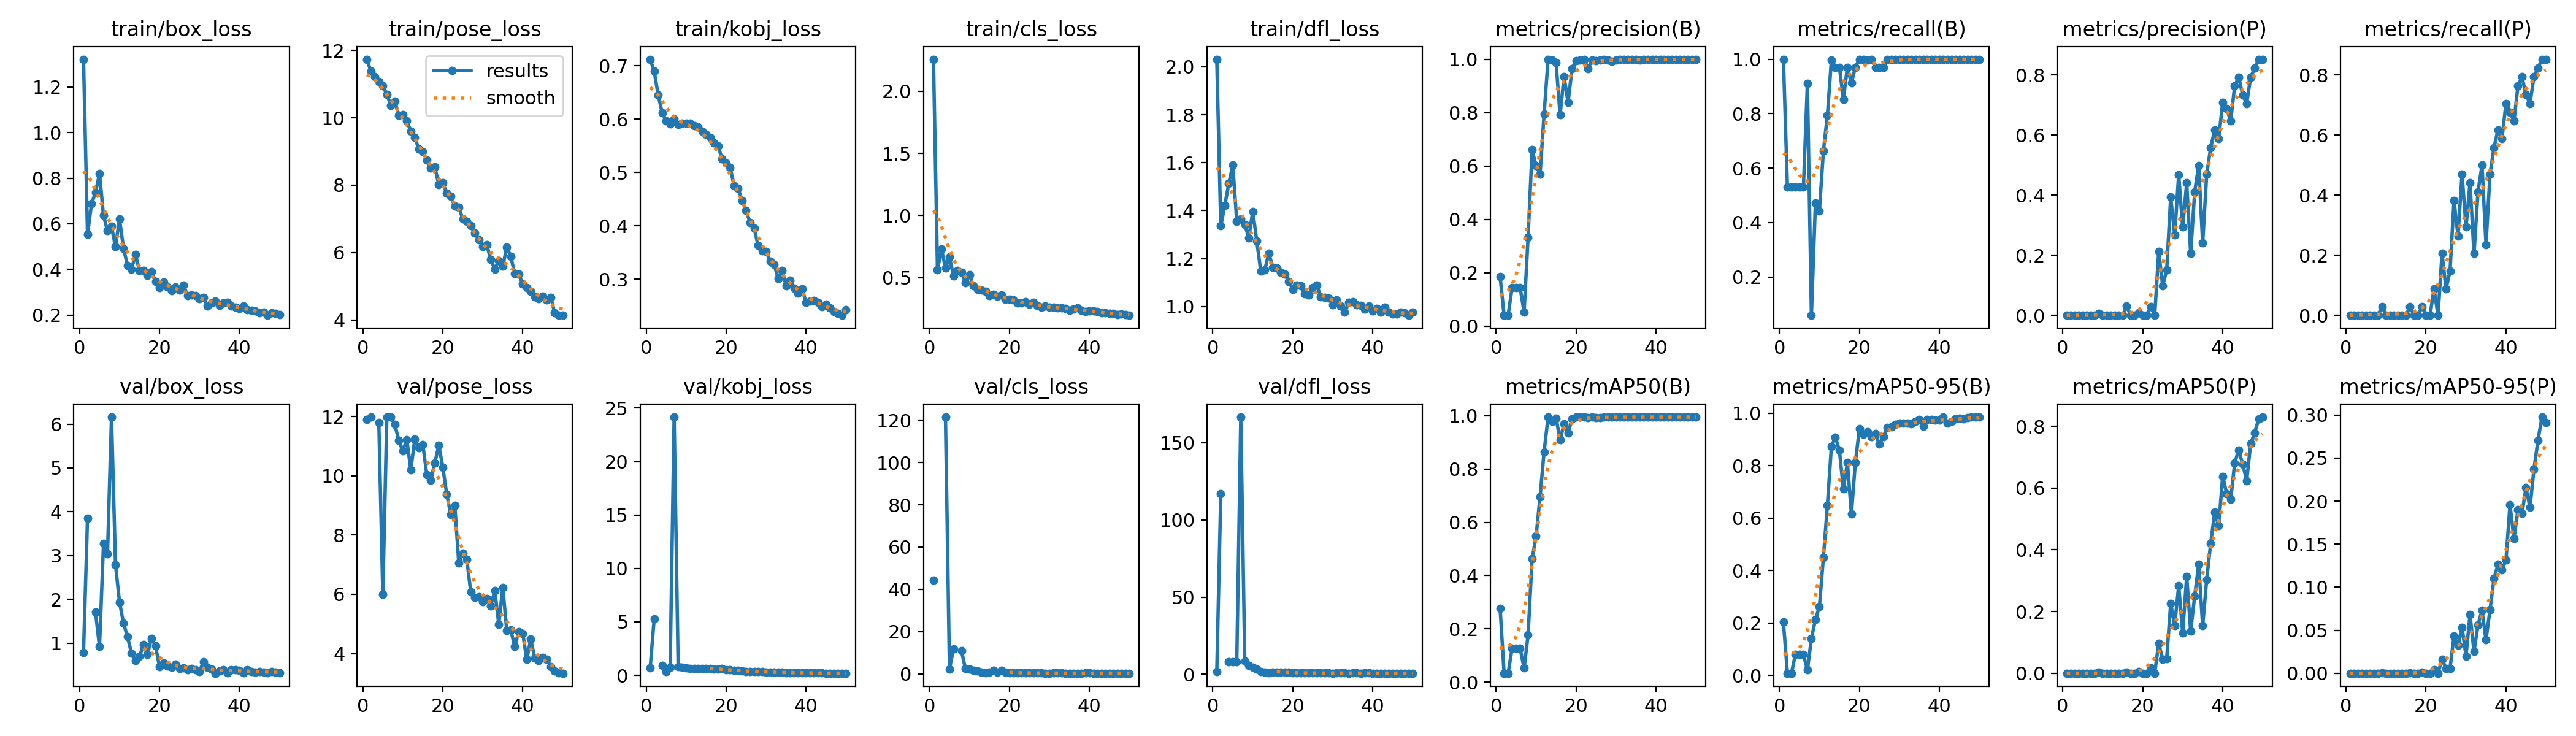

In [21]:
%cd {HOME}
Image(filename=r'Results/football_training_pitch_b16_e50_8x/results.png', width=600)

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP


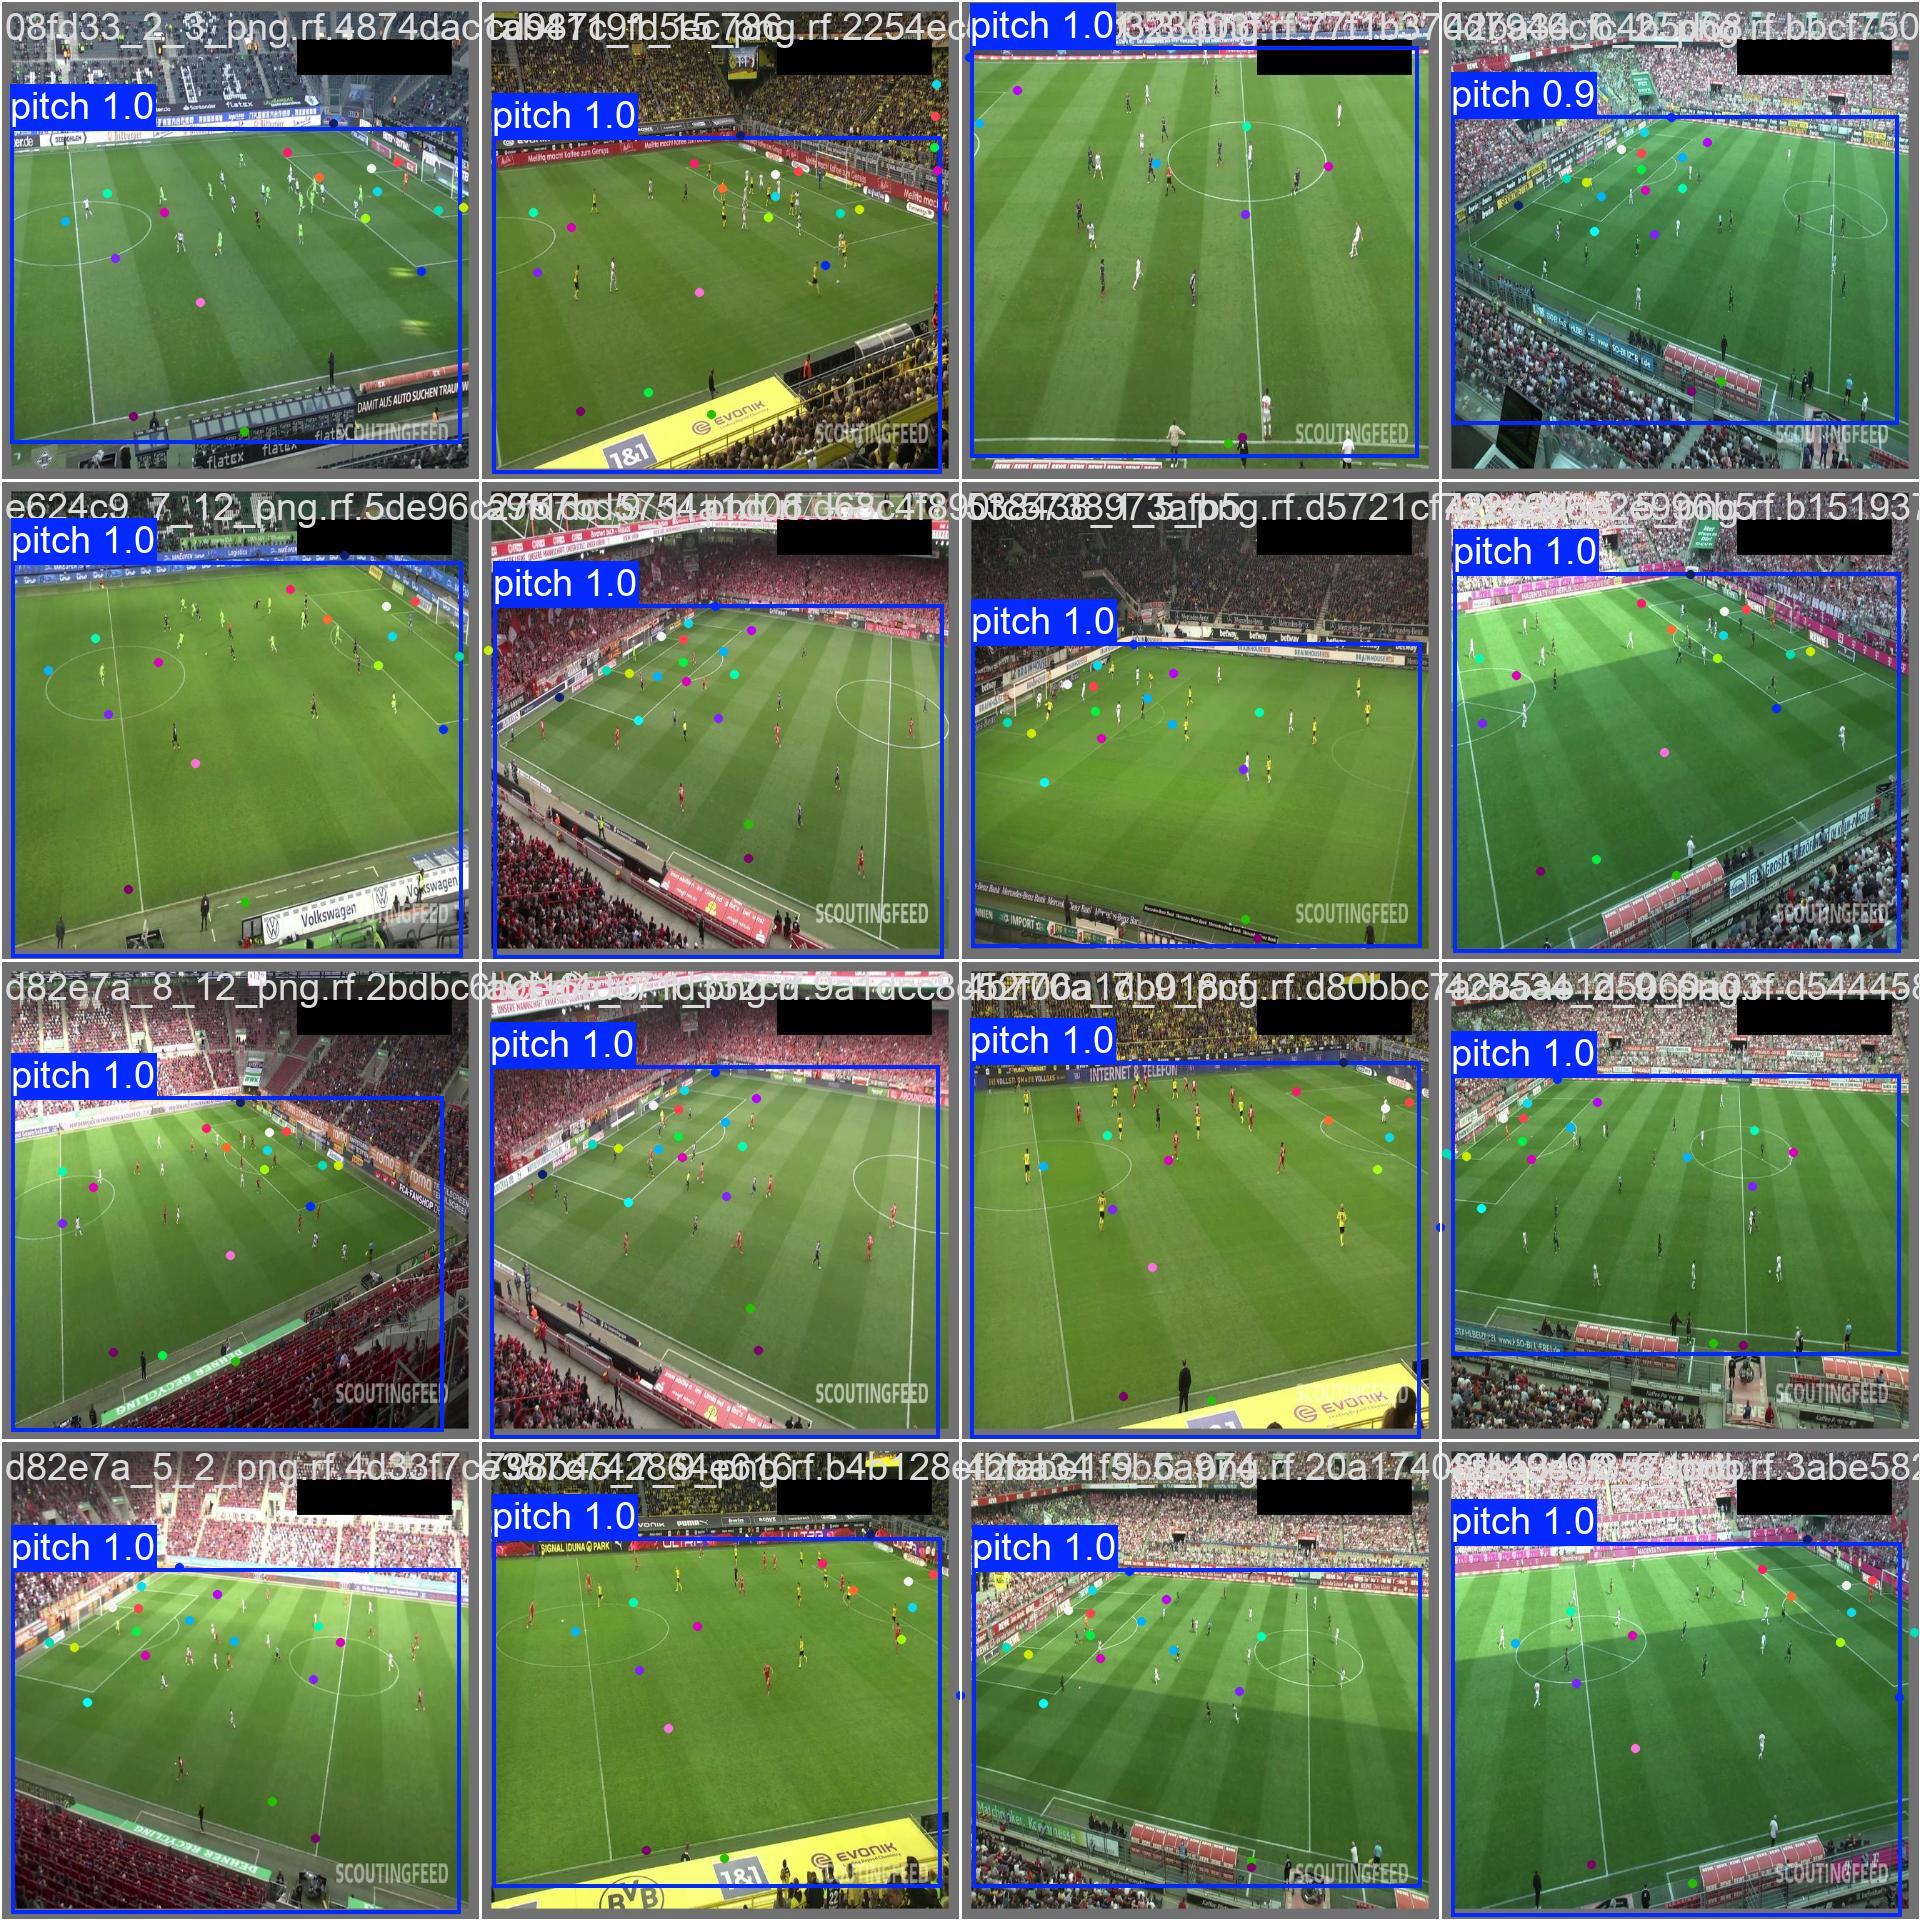

In [22]:
%cd {HOME}
Image(filename=r'Results/football_training_pitch_b16_e50_8x/val_batch0_pred.jpg', width=600)

## Validate custom model

In [23]:
%cd {HOME}

!yolo task=pose mode=val model="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\Results\football_training_pitch_b16_e50_8x\weights\best.pt" data="C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\data.yaml"

c:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP
Ultralytics 8.3.69 🚀 Python-3.8.8 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
YOLOv8x-pose summary (fused): 287 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
                   all         34         34      0.999          1      0.995      0.985      0.852      0.853      0.826        0.3
Speed: 1.7ms preprocess, 11.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to d:\adithya\runs\pose\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\valid\labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]
val: Scanning C:\Users\aimlc\OneDrive\Desktop\PESU_ITTIAM\CAP\football-field-detection-15\valid\labels.cache... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:01<00:03,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:01<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)